In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from shapely.geometry import  Point
import geopandas as gpd
from sklearn.preprocessing import LabelEncoder

In [2]:
### The most appropriate evaluation metric for such problems is the multi-class logarithmic loss. Logarithmic loss measures the performance of a classification model where the prediction output is a probability value between 0 and 1. For each incident, we will predict a set of predicted probabilities (one for every class), and we will calculate the average deviation from the real values. To get a little more intuition on the metric, for a specific incident:

   ### We get 0 loss from the categories of crimes that did not happen (since yij =0 yijlog(pij)) no matter our predicted probability.
   ### We get log(pij) loss from the category that happened, where pij is our predicted probability for the specific category.

### We have to note here that since all the probabilities for a specific incident sum to 1, each probability we predict for a category that did not happen creates an “indirect” loss since it decreases our predicted probability for the category of crime that happened. In other words, the metric evaluates the certainty of our model for each category of crime/incident.
## Analysis




## More specifically it includes the following variables.

#     Dates - timestamp of the crime incident
#     type - category of the crime incident. (This is our target variable.)
#     Descript - detailed description of the crime incident
#     DayOfWeek - the day of the week
#     X - Longitude
#     Y - Latitude
 #  the dataset iin onehot encoded for categorical based modelling.
    
    
    
    ## here we can use logistic regression for training the data. we can better get results by using stratified traintest split 
    ## so as to get equal no of each category in train test split for enough epochs to get prediction level correct
    ## further we can test our prediction results using ROC_AUC score
    ## we can also use LASSO and RIdge for better tuning the hyperparameters, and getting better prediction resultus.


In [3]:
df = pd.read_csv("main_data.csv")
df.head(10)

,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter,act379,act13,act279,act323,act363,act302,latitude,longitude
0,2018.0,2.0,28.0,21.0,59.0,9.0,9.0,2.0,2.0,1.0,1,0,0,0,0,0,22.720992,75.876083
1,2018.0,2.0,28.0,10.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,1,0,0,0,22.736676,75.883168
2,2018.0,2.0,28.0,10.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,1,0,0,0,22.746527,75.887139
3,2018.0,2.0,28.0,10.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,1,0,0,0,22.769531,75.888772
4,2018.0,2.0,28.0,14.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,0,1,0,0,22.735218,75.913366
5,2018.0,2.0,28.0,8.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,0,0,1,0,22.736766,75.908579
6,2018.0,2.0,28.0,3.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,0,1,0,0,22.736766,75.908579
7,2018.0,2.0,28.0,1.0,59.0,9.0,9.0,2.0,2.0,1.0,1,0,0,0,0,0,22.722247,75.915294
8,2018.0,2.0,28.0,19.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,0,1,0,0,22.722247,75.915294
9,2018.0,2.0,28.0,14.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,0,1,0,0,22.741662,75.869137


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        2067 non-null   float64
 1   month       2067 non-null   float64
 2   day         2067 non-null   float64
 3   hour        2067 non-null   float64
 4   dayofyear   2067 non-null   float64
 5   week        2067 non-null   float64
 6   weekofyear  2067 non-null   float64
 7   dayofweek   2067 non-null   float64
 8   weekday     2067 non-null   float64
 9   quarter     2067 non-null   float64
 10  act379      2067 non-null   int64  
 11  act13       2067 non-null   int64  
 12  act279      2067 non-null   int64  
 13  act323      2067 non-null   int64  
 14  act363      2067 non-null   int64  
 15  act302      2067 non-null   int64  
 16  latitude    2067 non-null   float64
 17  longitude   2067 non-null   float64
dtypes: float64(12), int64(6)
memory usage: 290.8 KB


In [5]:
df.describe()

,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter,act379,act13,act279,act323,act363,act302,latitude,longitude
count,2067.0,2067.000000,2067.000000,2067.000000,2067.000000,2067.000000,2067.000000,2067.000000,2067.000000,2067.000000,2067.000000,2067.000000,2067.000000,2067.000000,2067.000000,2067.000000,2067.000000,2067.000000
mean,2018.0,3.575230,9.496372,15.396226,87.093372,12.927431,12.927431,2.601355,2.601355,1.585389,0.191098,0.042574,0.329947,0.372521,0.053217,0.010643,22.715784,75.855258
std,0.0,2.029675,10.979624,5.826571,56.935269,8.133063,8.133063,1.535876,1.535876,0.720895,0.393261,0.201943,0.470307,0.483593,0.224521,0.102641,0.050299,0.060321
min,2018.0,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.531931,75.542195
25%,2018.0,2.000000,3.000000,13.000000,59.000000,9.000000,9.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.700190,75.834825
50%,2018.0,3.000000,3.000000,16.000000,62.000000,9.000000,9.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.719961,75.860504
75%,2018.0,5.000000,28.000000,20.000000,123.000000,18.000000,18.000000,3.000000,3.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,22.737602,75.885456
max,2018.0,7.000000,28.000000,23.000000,184.000000,27.000000,27.000000,6.000000,6.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.929638,76.032055


In [6]:
df.shape

(2067, 18)

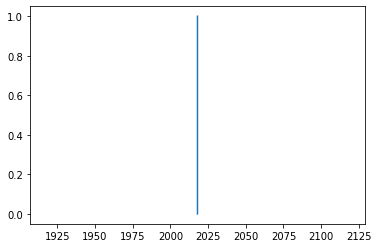

In [7]:

x = df['year']
y = df['act279']
plt.plot(x,y)
plt.show()

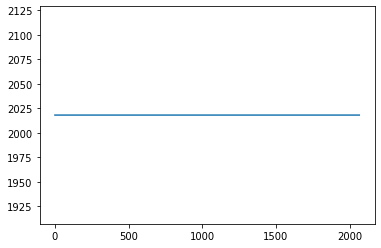

In [8]:
plt.plot(df['year'])
plt.show()

C:\Users\divyy\AppData\Roaming\Python\Python310\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


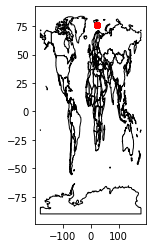

<Figure size 432x288 with 0 Axes>

In [11]:
#Evaluating the position of the data points using the coordinates.

def create_gdf(df):
    gdf = df.copy()
    gdf['Coordinates'] = list(zip(gdf.latitude, gdf.longitude))
    gdf.Coordinates = gdf.Coordinates.apply(Point)
    gdf = gpd.GeoDataFrame(
        gdf, geometry='Coordinates', crs={'init': 'epsg:4326'})
    return gdf

geo_df = create_gdf(df)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black')
geo_df.plot(ax=ax, color='red')
plt.show()

In [12]:
## gettting the onehotencoded column of crime type category back in single column for better visulaization.  

df_sub = df[['act379', 'act13', 'act279','act323','act363', 'act302']]

In [13]:
df_sub.head()
df_sub['type'] = df_sub.idxmax(1)
df_sub.head()

C:\Users\divyy\AppData\Local\Temp\ipykernel_26800\3076486154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['type'] = df_sub.idxmax(1)


,act379,act13,act279,act323,act363,act302,type
0,1,0,0,0,0,0,act379
1,0,0,1,0,0,0,act279
2,0,0,1,0,0,0,act279
3,0,0,1,0,0,0,act279
4,0,0,0,1,0,0,act323


In [14]:
type_column = df_sub.type
df = df.join(type_column)

In [15]:
df.head()

,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter,act379,act13,act279,act323,act363,act302,latitude,longitude,type
0,2018.0,2.0,28.0,21.0,59.0,9.0,9.0,2.0,2.0,1.0,1,0,0,0,0,0,22.720992,75.876083,act379
1,2018.0,2.0,28.0,10.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,1,0,0,0,22.736676,75.883168,act279
2,2018.0,2.0,28.0,10.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,1,0,0,0,22.746527,75.887139,act279
3,2018.0,2.0,28.0,10.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,1,0,0,0,22.769531,75.888772,act279
4,2018.0,2.0,28.0,14.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,0,1,0,0,22.735218,75.913366,act323


C:\Users\divyy\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


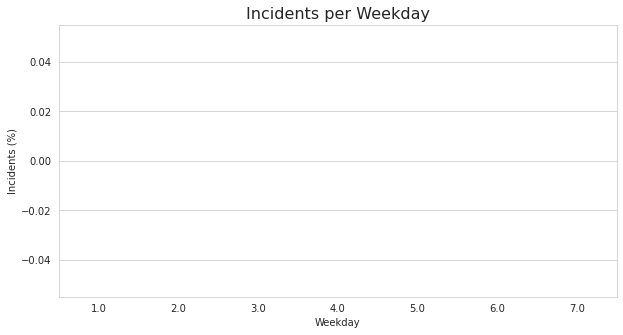

<Figure size 432x288 with 0 Axes>

In [17]:
## gettiing the insights into crime happening per week day

data = df.groupby('weekday').count().iloc[:, 0]
data = data.reindex([
    1.0, 2.0, 3.0, 4.0, 5.0, 6.0,7.0
])

plt.figure(figsize=(10, 5))
with sns.axes_style("whitegrid"):
    ax = sns.barplot(
        data.index, (data.values / data.values.sum()) * 100,
        orient='v',
        palette=cm.ScalarMappable(cmap='Reds').to_rgba(data.values))

plt.title('Incidents per Weekday', fontdict={'fontsize': 16})
plt.xlabel('Weekday')
plt.ylabel('Incidents (%)')
plt.show()
plt.savefig('images/weekday_graph.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


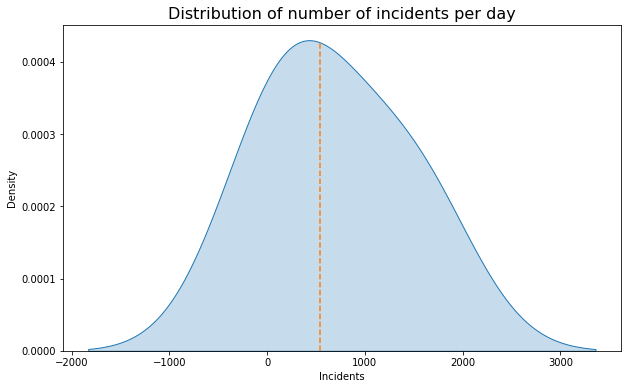

<Figure size 432x288 with 0 Axes>

In [18]:
## distribution of number of incidents per day

col = sns.color_palette()

plt.figure(figsize=(10, 6))
data = df.groupby('day').count().iloc[:, 0]
sns.kdeplot(data=data, shade=True)
plt.axvline(x=data.median(), ymax=0.95, linestyle='--', color=col[1])
plt.annotate(
    'Median: ' + str(data.median()),
    xy=(data.median(), 0.004),
    xytext=(200, 0.005),
    arrowprops=dict(arrowstyle='->', color=col[1], shrinkB=10))
plt.title(
    'Distribution of number of incidents per day', fontdict={'fontsize': 16})
plt.xlabel('Incidents')
plt.ylabel('Density')
plt.legend().remove()
plt.show()
plt.savefig("distribution.png")

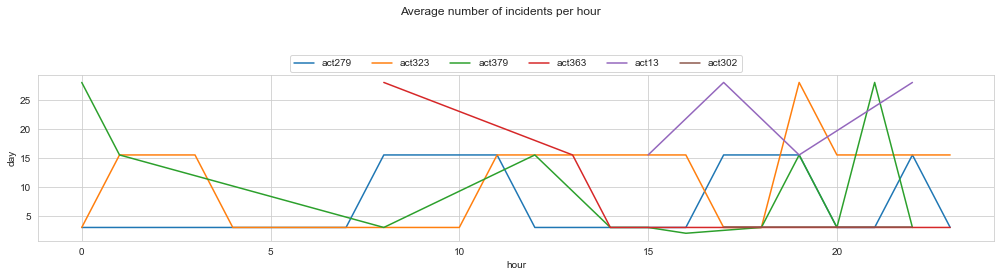

In [115]:
data = df.groupby(['hour', 'day', 'type'],
                     as_index=False).count().iloc[:, :4]
data.rename(columns={'Dates': 'Incidents'}, inplace=True)
data = data.groupby(['hour', 'type'], as_index=False).mean()
data = data.loc[data['type'].isin(
    ['act379', 'act13', 'act279','act323','act363', 'act302'])]

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 4))
ax = sns.lineplot(x='hour', y='day', data=data, hue='type')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=6)
plt.suptitle('Average number of incidents per hour')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [99]:
df.corr()

,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter,act379,act13,act279,act323,act363,act302,latitude,longitude
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,-0.459899,0.042193,0.983555,0.981963,0.981963,0.061485,0.061485,0.937821,-0.110496,-0.150707,0.152470,0.009406,-0.032157,0.047269,0.023027,0.158350
day,NaN,-0.459899,1.000000,-0.054041,-0.292107,-0.285856,-0.285856,-0.232407,-0.232407,-0.480691,-0.077131,0.175364,-0.183301,0.195792,-0.032319,-0.061384,0.016978,0.038509
hour,NaN,0.042193,-0.054041,1.000000,0.034207,0.035345,0.035345,-0.042108,-0.042108,0.055032,-0.048270,0.094257,-0.022473,-0.005170,0.024574,0.073070,0.004103,0.013590
dayofyear,NaN,0.983555,-0.292107,0.034207,1.000000,0.999636,0.999636,0.015980,0.015980,0.913976,-0.134545,-0.126303,0.126304,0.050174,-0.040790,0.038095,0.027621,0.178629
week,NaN,0.981963,-0.285856,0.035345,0.999636,1.000000,1.000000,-0.010997,-0.010997,0.920803,-0.133224,-0.124546,0.123187,0.051549,-0.041620,0.039194,0.024051,0.180065
weekofyear,NaN,0.981963,-0.285856,0.035345,0.999636,1.000000,1.000000,-0.010997,-0.010997,0.920803,-0.133224,-0.124546,0.123187,0.051549,-0.041620,0.039194,0.024051,0.180065
dayofweek,NaN,0.061485,-0.232407,-0.042108,0.015980,-0.010997,-0.010997,1.000000,1.000000,-0.250773,-0.049312,-0.065418,0.115842,-0.050859,0.030671,-0.040620,0.132401,-0.052810
weekday,NaN,0.061485,-0.232407,-0.042108,0.015980,-0.010997,-0.010997,1.000000,1.000000,-0.250773,-0.049312,-0.065418,0.115842,-0.050859,0.030671,-0.040620,0.132401,-0.052810
quarter,NaN,0.937821,-0.480691,0.055032,0.913976,0.920803,0.920803,-0.250773,-0.250773,1.000000,-0.075513,-0.134703,0.121012,0.000347,-0.028089,0.059668,-0.026844,0.152420


In [84]:
df.type.value_counts()

act323    770
act279    682
act379    395
act363    110
act13      88
act302     22
Name: type, dtype: int64

In [87]:
df.type.describe()

count       2067
unique         6
top       act323
freq         770
Name: type, dtype: object

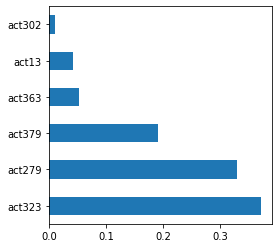

In [90]:
# number of crime normalized

plt.figure(figsize = [4,4])
df.type.value_counts(normalize = True).plot.barh()
plt.show()

<AxesSubplot:ylabel='year,type'>

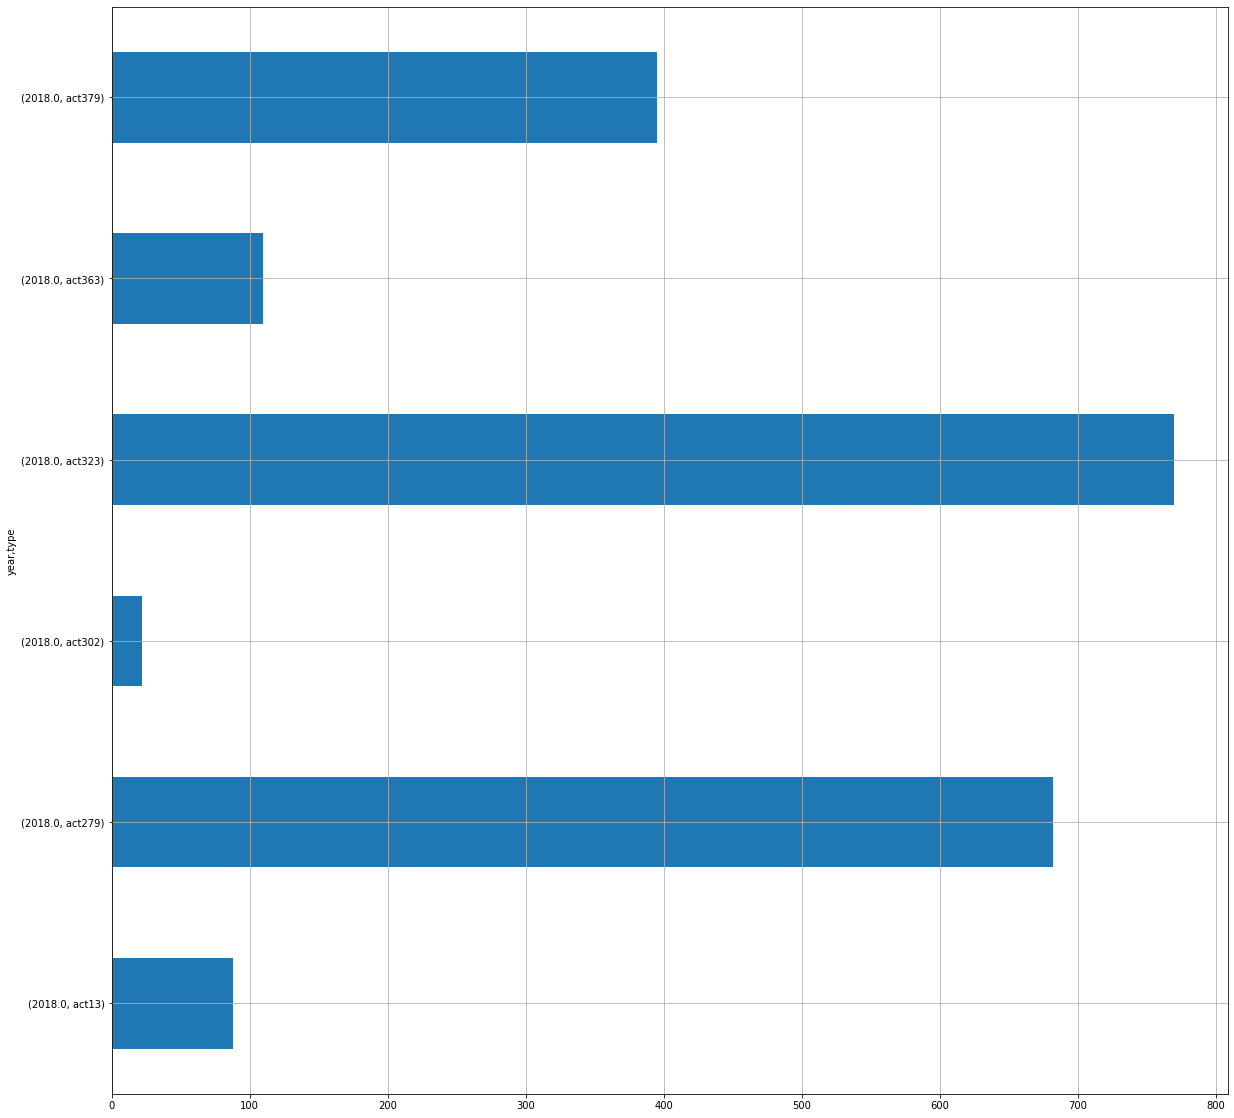

In [93]:
## Year and crime category relationship

df.groupby(['year', 'type']).size().plot(kind='barh', figsize=(20, 20), grid=True)

In [94]:
## hour of the day, crime type and year relationship

a = df.pivot_table(index='hour', columns='type', values=['year'], aggfunc='size')

<AxesSubplot:xlabel='hour'>

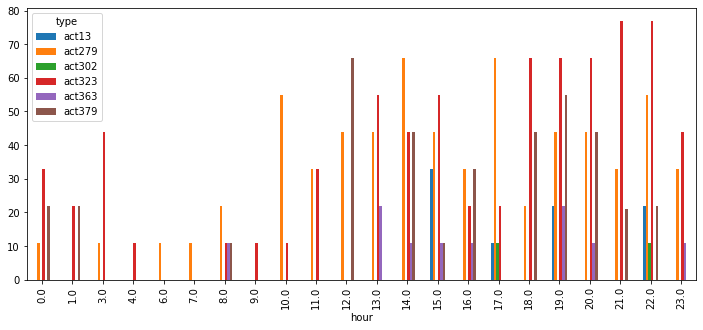

In [96]:
a.plot(kind='bar', figsize=(12, 5))